In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv(r"C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/Informe3-Upgrade/Personality.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality_mapped
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality_mapped         2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality_mapped'],
      dtype='object')

In [6]:
data["Personality_mapped"].value_counts()

Personality_mapped
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [7]:
for col in data:
    nulos = data[col].isnull().sum()
    print(f"   {col}: {nulos} nulos")

   Time_spent_Alone: 63 nulos
   Stage_fear: 73 nulos
   Social_event_attendance: 62 nulos
   Going_outside: 66 nulos
   Drained_after_socializing: 52 nulos
   Friends_circle_size: 77 nulos
   Post_frequency: 65 nulos
   Personality_mapped: 0 nulos


In [8]:
data_clean = data.dropna()
data_clean.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality_mapped           0
dtype: int64

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

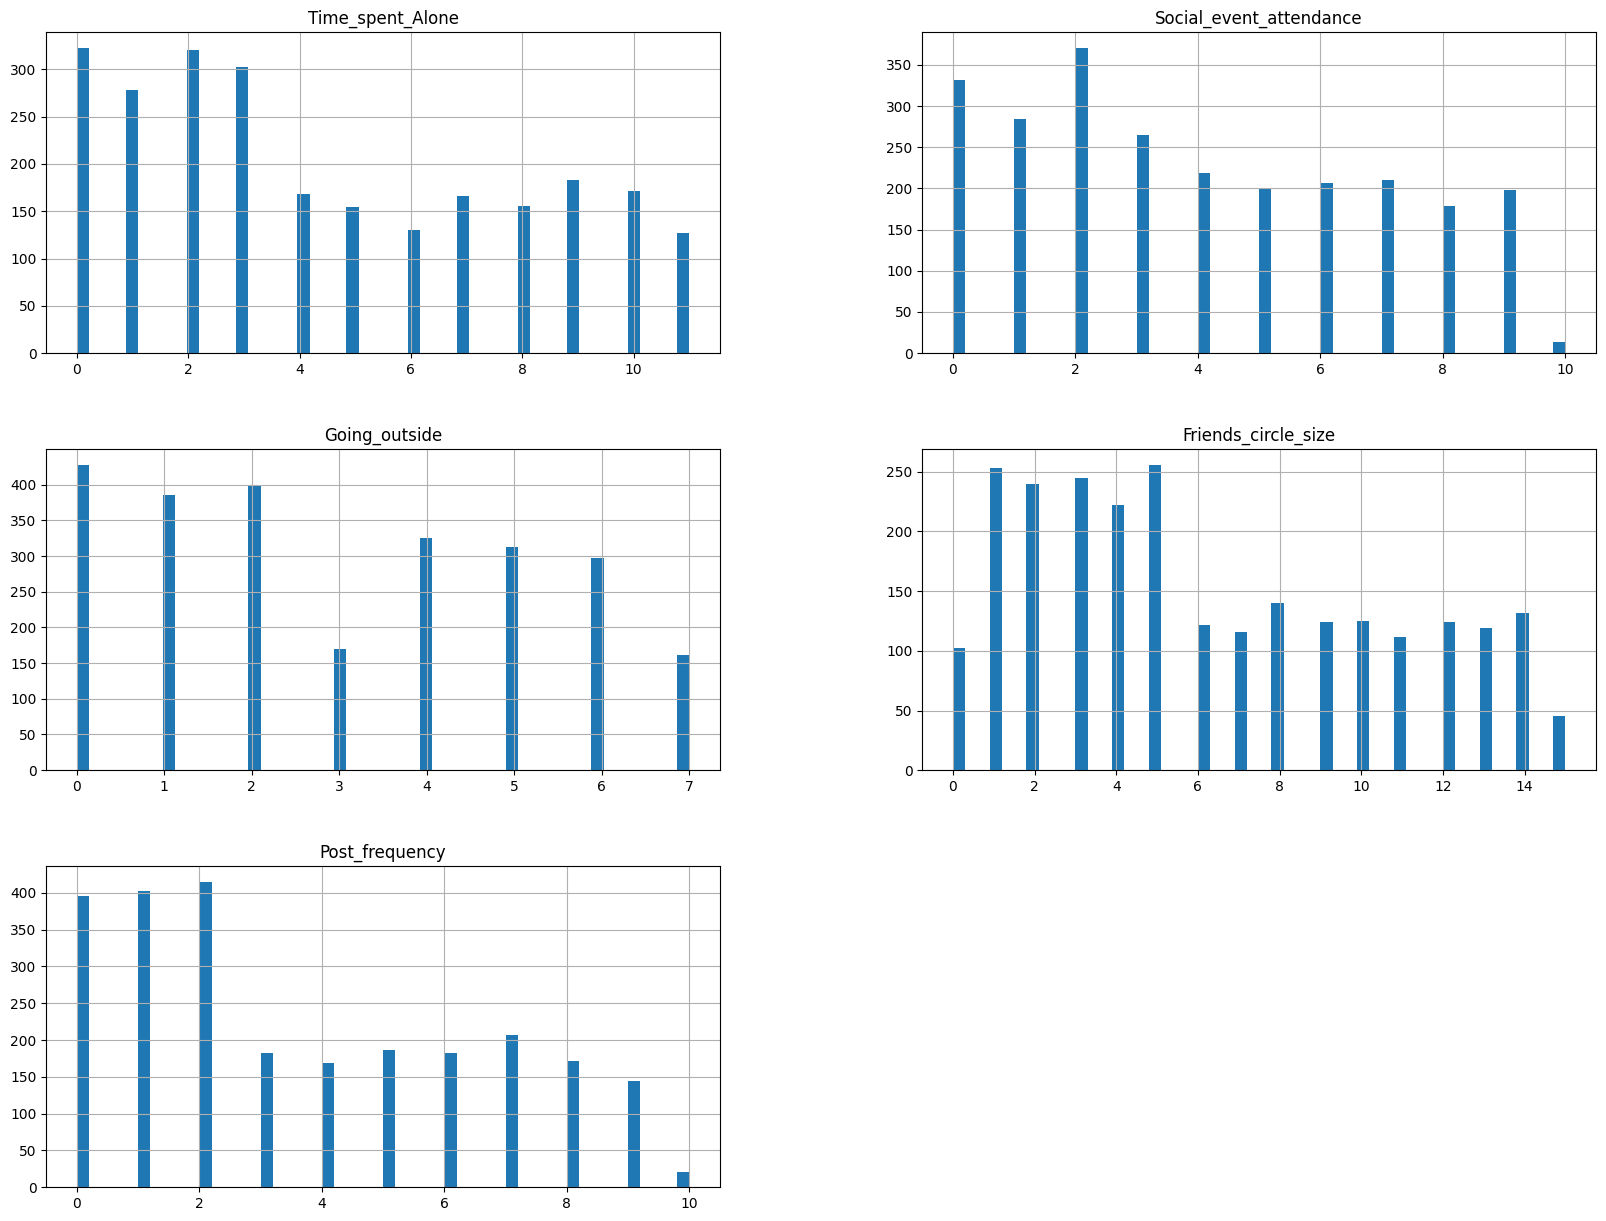

In [9]:
data_clean.hist(bins=50,figsize=(20,15))

<Axes: >

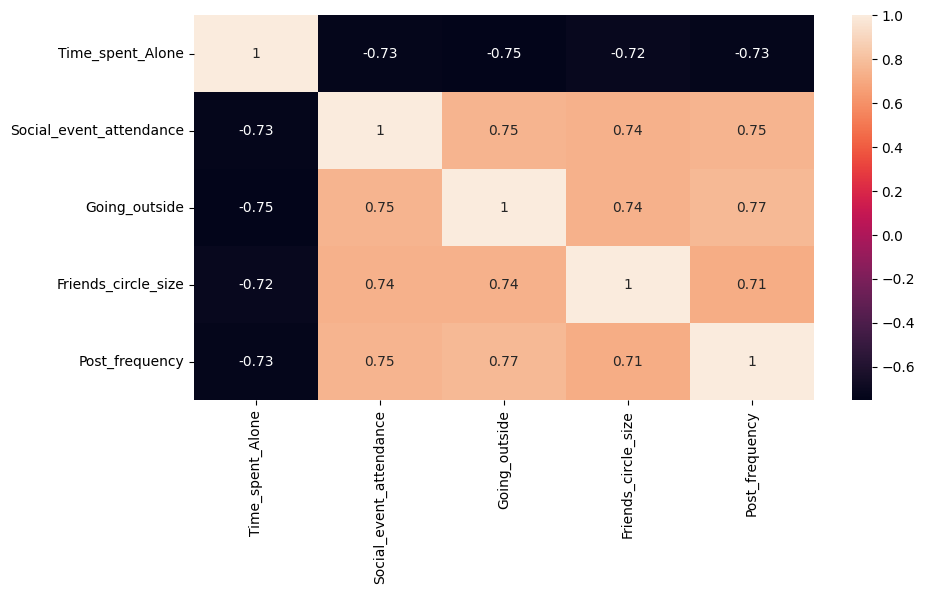

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data_clean.select_dtypes(include="number").corr(),annot=True)

In [11]:
# Manipulación de los datos categóricos 
from sklearn.preprocessing import OrdinalEncoder 

data_personality = data_clean[["Personality_mapped"]]
data_personality

ordinal_encoder = OrdinalEncoder()
ordinal_encoder

data_personality_encoder = ordinal_encoder.fit_transform(data_personality)
data_personality_encoder


array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], shape=(2477, 1))

In [12]:
data_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality_mapped
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [13]:
np.random.choice(data_personality_encoder.ravel(),size=10)

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0.])

In [14]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder

data_cat_1hot = cat_encoder.fit_transform(data_personality)

data_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], shape=(2477, 2))

In [15]:
cat_encoder.categories_

[array(['Extrovert', 'Introvert'], dtype=object)]

In [16]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns = cat_encoder.get_feature_names_out())
encoded_df.head()

,Personality_mapped_Extrovert,Personality_mapped_Introvert
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [17]:
# Unimos el dataframe original con el dataframe codificado one-hot
data_combined = pd.concat([data_clean, encoded_df], axis=1)
data_combined.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality_mapped,Personality_mapped_Extrovert,Personality_mapped_Introvert
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,1.0,0.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,0.0,1.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,0.0,1.0
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,1.0,0.0
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,1.0,0.0


In [18]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 0 to 2475
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time_spent_Alone              2477 non-null   float64
 1   Stage_fear                    2477 non-null   object 
 2   Social_event_attendance       2477 non-null   float64
 3   Going_outside                 2477 non-null   float64
 4   Drained_after_socializing     2477 non-null   object 
 5   Friends_circle_size           2477 non-null   float64
 6   Post_frequency                2477 non-null   float64
 7   Personality_mapped            2477 non-null   object 
 8   Personality_mapped_Extrovert  2477 non-null   float64
 9   Personality_mapped_Introvert  2477 non-null   float64
dtypes: float64(7), object(3)
memory usage: 242.3+ KB


In [19]:
data_clean.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality_mapped'],
      dtype='object')

In [20]:
# Primero crear variable numérica
data_clean['Personality_numeric'] = data_clean['Personality_mapped'].map({'Extrovert': 1, 'Introvert': 0})
y = data_clean['Personality_numeric'].values  # Sin .reshape(-1,1) para clasificadores

# Verificar
print(f"✅ y shape: {y.shape}")
print(f"✅ y unique values: {np.unique(y)}")

✅ y shape: (2477,)
✅ y unique values: [0 1]


C:\Users\Rocio\AppData\Local\Temp\ipykernel_13820\3166024152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Personality_numeric'] = data_clean['Personality_mapped'].map({'Extrovert': 1, 'Introvert': 0})


In [21]:
data_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality_mapped,Personality_numeric
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,0
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,1
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,1


In [22]:
# PASO 1: Primero crear la variable objetivo numérica
print("📊 Verificando datos:")
print(f"Columnas disponibles: {data_clean.columns.tolist()}")

# Crear variable objetivo numérica (asumiendo que tienes 'Personality_mapped')
data_clean['Personality_numeric'] = data_clean['Personality_mapped'].map({'Extrovert': 1, 'Introvert': 0})

# Verificar el mapeo
print("✅ Variable objetivo creada:")
print(data_clean[['Personality_mapped', 'Personality_numeric']].head())
print(f"Valores únicos: {data_clean['Personality_numeric'].unique()}")

# PASO 2: Código corregido para clasificación
from sklearn.tree import DecisionTreeClassifier  # ← CAMBIO: Classifier en lugar de Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # ← CAMBIO: accuracy_score en lugar de r2_score

columnas = ['Time_spent_Alone', 'Social_event_attendance',
           'Going_outside', 'Friends_circle_size',
           'Post_frequency']

# Variable objetivo numérica
y = data_clean['Personality_numeric'].values  # ← CAMBIO: Usar variable numérica
col_modelo = []

for col in columnas: 
    col_modelo.append(col)
    data1 = data_clean[col_modelo]
    X = data1.values
    print(f"📊 Shapes - X: {X.shape}, y: {y.shape}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # CAMBIO: Usar Classifier
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # CAMBIO: Usar accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Columnas: {col_modelo}, Accuracy: {accuracy:.4f}")

📊 Verificando datos:
Columnas disponibles: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality_mapped', 'Personality_numeric']
✅ Variable objetivo creada:
  Personality_mapped  Personality_numeric
0          Extrovert                    1
1          Introvert                    0
2          Introvert                    0
3          Extrovert                    1
4          Extrovert                    1
Valores únicos: [1 0]


C:\Users\Rocio\AppData\Local\Temp\ipykernel_13820\441166547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Personality_numeric'] = data_clean['Personality_mapped'].map({'Extrovert': 1, 'Introvert': 0})


📊 Shapes - X: (2477, 1), y: (2477,)
Columnas: ['Time_spent_Alone'], Accuracy: 0.9234
📊 Shapes - X: (2477, 2), y: (2477,)
Columnas: ['Time_spent_Alone', 'Social_event_attendance'], Accuracy: 0.9274
📊 Shapes - X: (2477, 3), y: (2477,)
Columnas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside'], Accuracy: 0.9274
📊 Shapes - X: (2477, 4), y: (2477,)
Columnas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size'], Accuracy: 0.8931
📊 Shapes - X: (2477, 5), y: (2477,)
Columnas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'], Accuracy: 0.8891


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Usar los datos del último split
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)  # ← Sin .ravel() porque y_train ya es 1D

# Predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluación
acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.907258064516129
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.92      0.89      0.91       246

    accuracy                           0.91       496
   macro avg       0.91      0.91      0.91       496
weighted avg       0.91      0.91      0.91       496

Confusion Matrix:
 [[230  20]
 [ 26 220]]


In [24]:
# Probar el modelo Random Forest con los datos de prueba y mostrar algunas predicciones
sample_idx = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_idx]
y_true_sample = y_test[sample_idx].ravel()
y_pred_sample = rf_clf.predict(X_sample)

for i, (true, pred) in enumerate(zip(y_true_sample, y_pred_sample)):
    print(f"Ejemplo {i+1}: Real = {true}, Predicho = {pred}")

Ejemplo 1: Real = 0, Predicho = 0
Ejemplo 2: Real = 0, Predicho = 0
Ejemplo 3: Real = 0, Predicho = 0
Ejemplo 4: Real = 1, Predicho = 1
Ejemplo 5: Real = 1, Predicho = 1
Ejemplo 6: Real = 0, Predicho = 0
Ejemplo 7: Real = 0, Predicho = 0
Ejemplo 8: Real = 0, Predicho = 0
Ejemplo 9: Real = 1, Predicho = 1
Ejemplo 10: Real = 1, Predicho = 1


In [25]:
# Introducir una nueva persona (puedes modificar los valores según el caso)
# Orden de las características: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
nueva_persona = np.array([[5, 3, 4, 7, 6]])

# Predecir con el modelo Random Forest
prediccion = rf_clf.predict(nueva_persona)[0]

# Mostrar el resultado
if prediccion == 1:
    print("La persona es Extrovert")
else:
    print("La persona es Introvert")

La persona es Extrovert


In [26]:
import joblib
joblib.dump(rf_clf, "rf_model_personality.pkl")

['rf_model_personality.pkl']

In [27]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality_mapped         2477 non-null   object 
 8   Personality_numeric        2477 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 258.1+ KB


<Axes: >

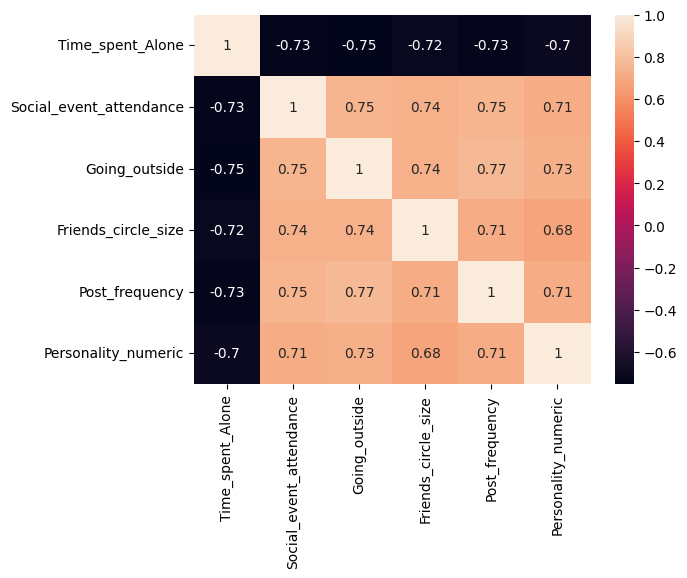

In [28]:
corr_matrix = data_clean.select_dtypes(include=[np.number]).corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True)

Time_spent_Alone: -0.023358070651126966
Social_event_attendance: 0.033928771250789094
Going_outside: 0.04955686287606444
Friends_circle_size: 0.015176123163687216
Post_frequency: 0.030213301008963328


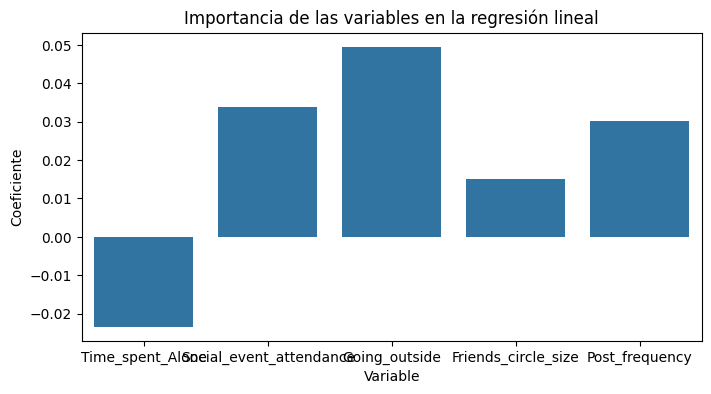

In [29]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Obtener los coeficientes de las variables
coeficientes = lin_reg.coef_.flatten()
variables = col_modelo

# Mostrar la importancia de cada variable
for var, coef in zip(variables, coeficientes):
    print(f"{var}: {coef}")

# Visualizar la importancia de las variables
plt.figure(figsize=(8,4))
sns.barplot(x=variables, y=coeficientes)
plt.title("Importancia de las variables en la regresión lineal")
plt.ylabel("Coeficiente")
plt.xlabel("Variable")
plt.show()

In [32]:
data_clean.to_csv("personality_data_export.csv", index=False)